In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import lzma
plt.style.use('seaborn-darkgrid')

/tmp/ipykernel_73045/1718445505.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [12]:
def compression_load_data(prefix, filenames):
    first_data = []
    for filename in filenames:
        first_data.append(os.path.getsize(prefix + filename))
    print(first_data)
    def compress_file(file_path, output_file):
        with open(file_path, 'rb') as input_file, lzma.open(output_file, 'wb') as output:
            output.write(input_file.read())

    for filename in filenames:
        compress_file(prefix + filename, "compressed/" + filename)
        
    compressed_data = []
    for filename in filenames:
        compressed_data.append(os.path.getsize("compressed/" + filename))
    print(compressed_data)
    
    pd_compressed = pd.DataFrame({"przed_kompresja": first_data, "po_kompresji": compressed_data})
    pd_compressed
    return pd_compressed

def plot_data(pd, title, ylabel, xticks_range, xticks_label):
    plt.title(title)
    plt.plot(pd.iloc[:, 1], label="skompresowane", marker='o')
    plt.plot(pd.iloc[:, 0], label="przed kompresja", marker='v')
    plt.legend(loc="upper left")
    plt.ylabel(ylabel)
    plt.xticks(xticks_range, xticks_label)
    plt.xlabel("Wielkosc pliku przed kompresja")
    plt.show()

## Dane w jezyku angielskim

### Od 10b do 300b

In [39]:
prefix = "data/"
range_1 = [0,1,2,3,4]
range_2 = [0,1,2,3]
list_b = ['10b', '50b', '100b', '200b', '300b']
list_kb = ['1kb', '5kb', '10kb', '30kb', '50kb']
list_kb1 = ["100kb", "280kb", "560kb", "1.3Mb"]
list_kb2 = ["10b", "50b", "100b", "200b", "300b"]
list_mb = ['10Mb', '20Mb', '40Mb', '80Mb']
filenames = ["10b.txt", "50b.txt", "100b.txt", "200b.txt", "300b.txt"]
pd_compressed = compression_load_data(prefix, filenames)
pd_compressed

[9, 49, 101, 202, 304]
[68, 108, 148, 224, 296]


,przed_kompresja,po_kompresji
0,9,68
1,49,108
2,101,148
3,202,224
4,304,296


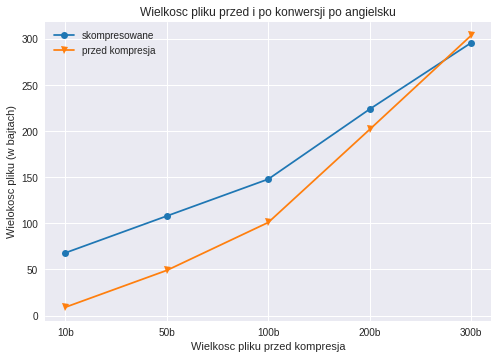

In [40]:
plot_data(pd_compressed, "Wielkosc pliku przed i po konwersji po angielsku", "Wielokosc pliku (w bajtach)",
         range_1, list_b)

### Od 1kb do 50kb

In [44]:
filenames = ["1kb.txt", "5kb.txt", "10kb.txt", "30kb.txt", "50kb.txt"]
pd_compressed = compression_load_data(prefix, filenames)
pd_compressed

[1066, 5050, 10099, 30299, 52294]
[548, 572, 596, 648, 700]


,przed_kompresja,po_kompresji
0,1066,548
1,5050,572
2,10099,596
3,30299,648
4,52294,700


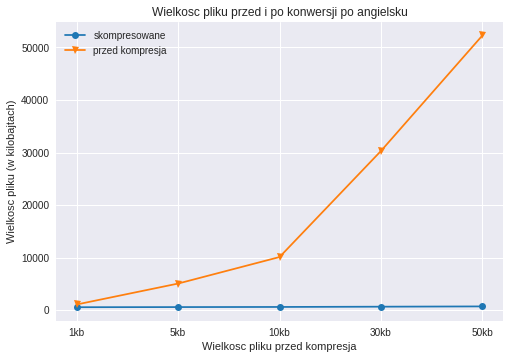

In [45]:
plot_data(pd_compressed, "Wielkosc pliku przed i po konwersji po angielsku", "Wielkosc pliku (w kilobajtach)",
         range_1, list_kb)

### Od 100kb do 1.3Mb

In [46]:
filenames = ["100kb.txt", "280kb.txt", "560kb.txt", "1.3Mb.txt"]
pd_compressed = compression_load_data(prefix, filenames)
pd_compressed

[103646, 281250, 550892, 1305218]
[816, 78848, 1568, 88204]


,przed_kompresja,po_kompresji
0,103646,816
1,281250,78848
2,550892,1568
3,1305218,88204


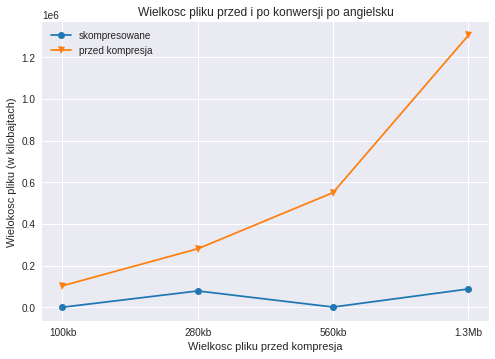

In [49]:
plot_data(pd_compressed, "Wielkosc pliku przed i po konwersji po angielsku", "Wielokosc pliku (w kilobajtach)",
         range_2, list_kb1)

### Od 10Mb do 80Mb

In [51]:
filenames = ["10Mb.txt", "20Mb.txt", "40Mb.txt", "80Mb.txt"]
pd_compressed = compression_load_data(prefix, filenames)
pd_compressed

[9392950, 16437058, 39030413, 86489341]
[680388, 680932, 887560, 691532]


,przed_kompresja,po_kompresji
0,9392950,680388
1,16437058,680932
2,39030413,887560
3,86489341,691532


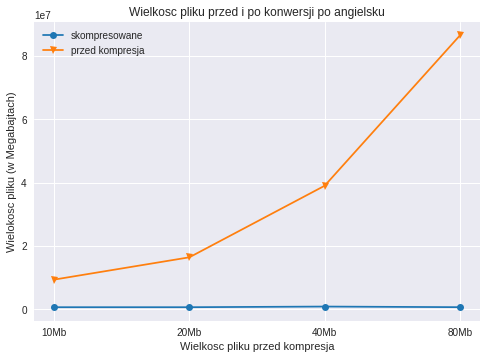

In [52]:
plot_data(pd_compressed, "Wielkosc pliku przed i po konwersji po angielsku", "Wielokosc pliku (w Megabajtach)",
         range_2, list_mb)

## Po lacinie

### Od 10b do 300b

In [56]:
prefix = "data_l/"
filenames = ["10b.txt", "50b.txt", "100b.txt", "200b.txt", "300b.txt"]
pd_compressed = compression_load_data(prefix, filenames)
pd_compressed

[10, 50, 100, 200, 300]
[68, 108, 156, 228, 296]


,przed_kompresja,po_kompresji
0,10,68
1,50,108
2,100,156
3,200,228
4,300,296


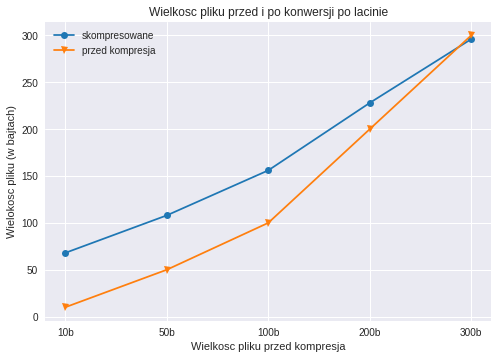

In [57]:
plot_data(pd_compressed, "Wielkosc pliku przed i po konwersji po lacinie", "Wielokosc pliku (w bajtach)",
         range_1, list_b)

### Od 1kb do 50kb 

In [59]:
filenames = ["1kb.txt", "5kb.txt", "10kb.txt", "30kb.txt", "50kb.txt"]
pd_compressed = compression_load_data(prefix, filenames)
pd_compressed

[945, 5028, 10068, 30196, 50348]
[476, 1916, 3204, 8064, 12884]


,przed_kompresja,po_kompresji
0,945,476
1,5028,1916
2,10068,3204
3,30196,8064
4,50348,12884


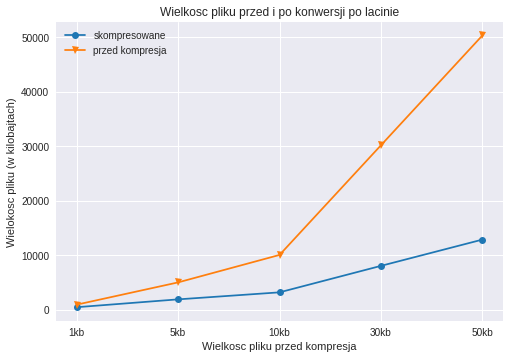

In [60]:
plot_data(pd_compressed, "Wielkosc pliku przed i po konwersji po lacinie", "Wielokosc pliku (w kilobajtach)",
         range_1, list_kb)

### Od 100kb do 1Mb

In [61]:
filenames = ["100kb.txt", "300kb.txt", "500kb.txt", "1mb.txt"]
pd_compressed = compression_load_data(prefix, filenames)
pd_compressed

[100652, 301960, 503256, 1020334]
[23692, 23796, 23824, 24072]


,przed_kompresja,po_kompresji
0,100652,23692
1,301960,23796
2,503256,23824
3,1020334,24072


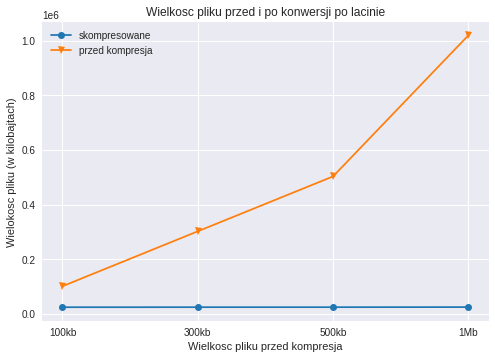

In [63]:
plot_data(pd_compressed, "Wielkosc pliku przed i po konwersji po lacinie", "Wielokosc pliku (w kilobajtach)",
         range_2, ['100kb', '300kb', '500kb', '1Mb'])

## Po polsku

### Od 10b do 300b

In [65]:
prefix = 'data_p/'
filenames = ["10b.txt", "50b.txt", "100b.txt", "200b.txt", "300b.txt"]
pd_compressed = compression_load_data(prefix, filenames)
pd_compressed

[9, 47, 97, 198, 304]
[68, 104, 156, 248, 324]


,przed_kompresja,po_kompresji
0,9,68
1,47,104
2,97,156
3,198,248
4,304,324


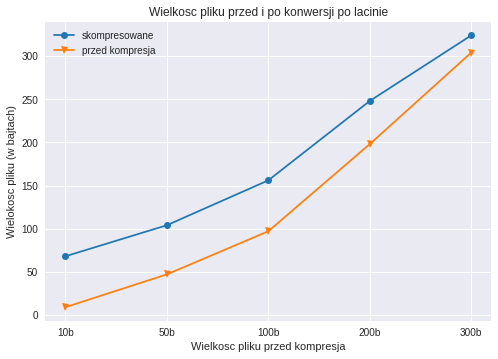

In [67]:
plot_data(pd_compressed, "Wielkosc pliku przed i po konwersji po lacinie", "Wielokosc pliku (w bajtach)",
         range_1, list_b)

### Od 1kb do 50kb

In [69]:
filenames = ["1kb.txt", "5kb.txt", "10kb.txt", "30kb.txt", "50kb.txt"]
pd_compressed = compression_load_data(prefix, filenames)
pd_compressed

[1017, 5093, 10454, 30466, 50321]
[760, 2068, 5036, 11564, 15636]


,przed_kompresja,po_kompresji
0,1017,760
1,5093,2068
2,10454,5036
3,30466,11564
4,50321,15636


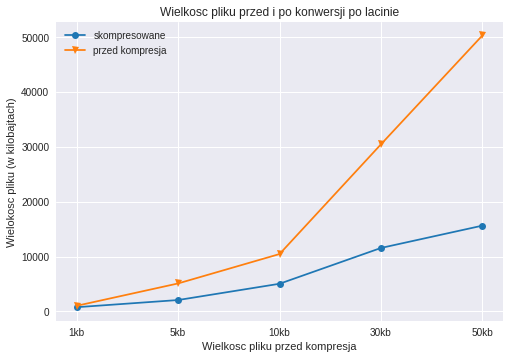

In [70]:
plot_data(pd_compressed, "Wielkosc pliku przed i po konwersji po lacinie", "Wielokosc pliku (w kilobajtach)",
         range_1, list_kb)

### Od 100kb do 1Mb

In [71]:
filenames = ["100kb.txt", "300kb.txt", "500kb.txt", "1mb.txt"]
pd_compressed = compression_load_data(prefix, filenames)
pd_compressed

[102976, 308928, 514880, 1029760]
[15812, 15872, 15904, 15976]


,przed_kompresja,po_kompresji
0,102976,15812
1,308928,15872
2,514880,15904
3,1029760,15976


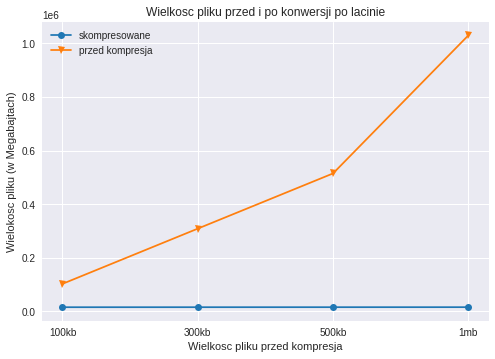

In [76]:
plot_data(pd_compressed, "Wielkosc pliku przed i po konwersji po lacinie", "Wielokosc pliku (w Megabajtach)",
         range_2, ["100kb", "300kb", "500kb", "1mb"])

### Wspolczynniki kompresji

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Utworzono plik compression_rate/lorem_10b.txt
Utworzono plik compression_rate/lorem_50b.txt
Utworzono plik compression_rate/lorem_100b.txt
Utworzono plik compression_rate/lorem_200b.txt
Utworzono plik compression_rate/lorem_300b.txt


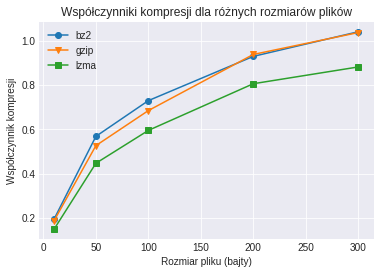

In [31]:
%pip install faker
import os
import zlib
import gzip
import bz2
import numpy as np
import matplotlib.pyplot as plt
from faker import Faker
from prettytable import PrettyTable

# Tworzenie obiektu Faker z ustawionym językiem na polski
fake = Faker('pl_PL')

# Rozmiary plików w bajtach
file_sizes = [10, 50, 100, 200, 300]


def compression_ratio(file_sizes, fake):
    compression_ratios_zlib = np.zeros(len(file_sizes))
    compression_ratios_gzip = np.zeros(len(file_sizes))
    compression_ratios_bz2 = np.zeros(len(file_sizes))
    compression_ratios_lzma = np.zeros(len(file_sizes))

    table = PrettyTable()
    table.field_names = ["Rozmiar pliku (bajty)", "bz2 - Wielkość po kompresji", "bz2 - Współczynnik kompresji",
                         "gzip - Wielkość po kompresji", "gzip - Współczynnik kompresji","lzma - Wielkość po kompresji", 
                         "lzma - Współczynnik kompresji"]

    # Pętla generująca pliki o różnych rozmiarach
    for i, size in enumerate(file_sizes):
        # Tworzenie tekstu o określonym rozmiarze
        lorem_text = ""
        while len(lorem_text.encode()) < size:
            paragraph = fake.text()
            lorem_text += paragraph

        # Tworzenie pliku txt o określonym rozmiarze
        file_name = f"compression_rate/lorem_{size}b.txt"
        with open(file_name, "w", encoding="utf-8") as file:
            file.write(lorem_text[:size - 1])

        print(f"Utworzono plik {file_name}")

        # Kompresja pliku przy użyciu różnych algorytmów
        compressed_file_bz2 = f"compression_rate/compressed_{size}b_bz2.bin"
        with open(file_name, "rb") as file_in, open(compressed_file_bz2, "wb") as file_out:
            compressed_data_bz2 = bz2.compress(file_in.read())
            file_out.write(compressed_data_bz2)

        compressed_file_gzip = f"compression_rate/compressed_{size}b_gzip.bin"
        with open(file_name, "rb") as file_in, gzip.open(compressed_file_gzip, "wb") as file_out:
            file_out.write(file_in.read())

        compressed_file_lzma = f"compression_rate/compressed_{size}b_lzma.bin"
        with open(file_name, "rb") as file_in, lzma.open(compressed_file_lzma, "wb") as file_out:
            file_out.write(file_in.read())

        # Obliczenie rozmiaru skompresowanego pliku
        size_bz2 = os.path.getsize(compressed_file_bz2)
        size_gzip = os.path.getsize(compressed_file_gzip)
        size_lzma = os.path.getsize(compressed_file_lzma)

        # Obliczenie współczynnika kompresji
        compression_ratio_bz2 = size / size_bz2
        compression_ratio_gzip = size / size_gzip
        compression_ratio_lzma = size / size_lzma

        compression_ratios_bz2[i] = compression_ratio_bz2
        compression_ratios_gzip[i] = compression_ratio_gzip
        compression_ratios_lzma[i] = compression_ratio_lzma

        # Dodawanie danych do tabeli
        table.add_row([size,
                       f"{size_bz2} bajtów",
                       f"{compression_ratio_bz2:.2f}",
                       f"{size_gzip} bajtów",
                       f"{compression_ratio_gzip:.2f}",
                       f"{size_lzma} bajtów",
                       f"{compression_ratio_lzma:.2f}"])

    
    pd_ratio = pd.DataFrame({'compression_ratios_bz2':compression_ratios_bz2, 
                             'compression_ratios_gzip':compression_ratios_gzip, 
                             'compression_ratios_lzma':compression_ratios_lzma})
    df = pd_ratio.rename(columns={'0': 'compression_ratios_bz2', '1': 'compression_ratios_gzip',
                                  '2':'compression_ratios_lzma'})
    
    # Wykresy
    plt.plot(file_sizes, compression_ratios_bz2, label='bz2', marker='o')
    plt.plot(file_sizes, compression_ratios_gzip, label='gzip', marker='v')
    plt.plot(file_sizes, compression_ratios_lzma, label='lzma', marker='s')
    plt.xlabel('Rozmiar pliku (bajty)')
    plt.ylabel('Współczynnik kompresji')
    plt.title('Współczynniki kompresji dla różnych rozmiarów plików')
    plt.legend()
    plt.show()
    
    return table, df
    
table, pd_ratio = compression_ratio(file_sizes, fake)

In [32]:
table

Rozmiar pliku (bajty),bz2 - Wielkość po kompresji,bz2 - Współczynnik kompresji,gzip - Wielkość po kompresji,gzip - Współczynnik kompresji,lzma - Wielkość po kompresji,lzma - Współczynnik kompresji
10,52 bajtów,0.19,54 bajtów,0.19,68 bajtów,0.15
50,88 bajtów,0.57,95 bajtów,0.53,112 bajtów,0.45
100,137 bajtów,0.73,146 bajtów,0.68,168 bajtów,0.60
200,215 bajtów,0.93,213 bajtów,0.94,248 bajtów,0.81
300,288 bajtów,1.04,289 bajtów,1.04,340 bajtów,0.88


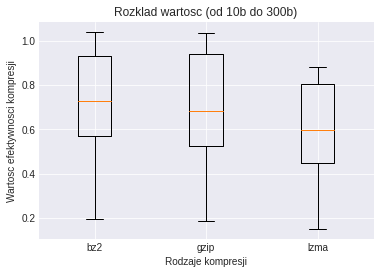

In [33]:
plt.boxplot(pd_ratio)
plt.title("Rozklad wartosc (od 10b do 300b)")
plt.xticks([1, 2, 3], ['bz2', 'gzip', 'lzma'])
plt.ylabel("Wartosc efektywnosci kompresji")
plt.xlabel("Rodzaje kompresji")
plt.show()

Utworzono plik compression_rate/lorem_1024b.txt
Utworzono plik compression_rate/lorem_10240b.txt
Utworzono plik compression_rate/lorem_51200b.txt
Utworzono plik compression_rate/lorem_102400b.txt


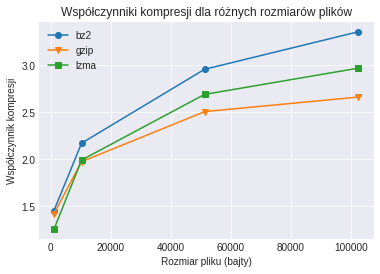

In [34]:
file_sizes = [1024, 10240, 51200, 102400]
table, pd_ratio = compression_ratio(file_sizes, fake)

In [35]:
table

Rozmiar pliku (bajty),bz2 - Wielkość po kompresji,bz2 - Współczynnik kompresji,gzip - Wielkość po kompresji,gzip - Współczynnik kompresji,lzma - Wielkość po kompresji,lzma - Współczynnik kompresji
1024,704 bajtów,1.45,720 bajtów,1.42,816 bajtów,1.25
10240,4716 bajtów,2.17,5185 bajtów,1.97,5140 bajtów,1.99
51200,17319 bajtów,2.96,20427 bajtów,2.51,19036 bajtów,2.69
102400,30518 bajtów,3.36,38474 bajtów,2.66,34496 bajtów,2.97


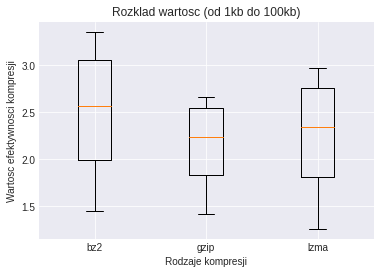

In [36]:
plt.boxplot(pd_ratio)
plt.title("Rozklad wartosc (od 1kb do 100kb)")
plt.xticks([1, 2, 3], ['bz2', 'gzip', 'lzma'])
plt.ylabel("Wartosc efektywnosci kompresji")
plt.xlabel("Rodzaje kompresji")
plt.show()

Utworzono plik compression_rate/lorem_10b.txt
Utworzono plik compression_rate/lorem_50b.txt
Utworzono plik compression_rate/lorem_100b.txt
Utworzono plik compression_rate/lorem_200b.txt
Utworzono plik compression_rate/lorem_300b.txt
Utworzono plik compression_rate/lorem_1024b.txt
Utworzono plik compression_rate/lorem_10240b.txt
Utworzono plik compression_rate/lorem_51200b.txt
Utworzono plik compression_rate/lorem_102400b.txt


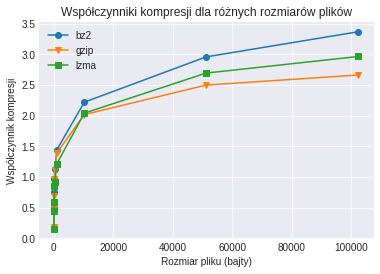

In [37]:
file_sizes = [10, 50, 100, 200, 300, 1024, 10240, 51200, 102400]
table, pd_ratio = compression_ratio(file_sizes, fake)

In [38]:
table

Rozmiar pliku (bajty),bz2 - Wielkość po kompresji,bz2 - Współczynnik kompresji,gzip - Wielkość po kompresji,gzip - Współczynnik kompresji,lzma - Wielkość po kompresji,lzma - Współczynnik kompresji
10,58 bajtów,0.17,55 bajtów,0.18,68 bajtów,0.15
50,100 bajtów,0.50,100 bajtów,0.50,112 bajtów,0.45
100,133 bajtów,0.75,145 bajtów,0.69,168 bajtów,0.60
200,206 bajtów,0.97,206 bajtów,0.97,236 bajtów,0.85
300,267 bajtów,1.12,269 bajtów,1.12,324 bajtów,0.93
1024,708 bajtów,1.45,734 bajtów,1.40,840 bajtów,1.22
10240,4612 bajtów,2.22,5073 bajtów,2.02,5016 bajtów,2.04
51200,17308 bajtów,2.96,20492 bajtów,2.50,19004 bajtów,2.69
102400,30406 bajtów,3.37,38445 bajtów,2.66,34540 bajtów,2.96


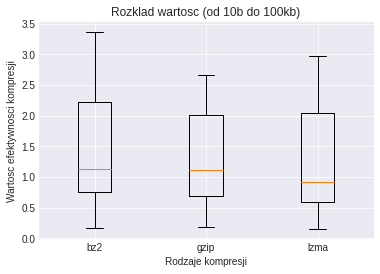

In [39]:
plt.boxplot(pd_ratio)
plt.title("Rozklad wartosc (od 10b do 100kb)")
plt.xticks([1, 2, 3], ['bz2', 'gzip', 'lzma'])
plt.ylabel("Wartosc efektywnosci kompresji")
plt.xlabel("Rodzaje kompresji")
plt.show()

## Czas kompresji i dekompresji

Utworzono plik compression_time/lorem_1024b.txt

Wyniki dla pliku compression_time/lorem_1024b.txt:
--------------------------------------------------
Kompresja:
 - Format:    Czas (s)
 - bz2:        0.0020914077758789062
 - gzip:       0.0005819797515869141
 - lzma:       0.0044629573822021484
Dekompresja:
 - Format:    Czas (s)
 - bz2:        0.0007958412170410156
 - gzip:       0.0003058910369873047
 - lzma:       0.0010247230529785156
--------------------------------------------------


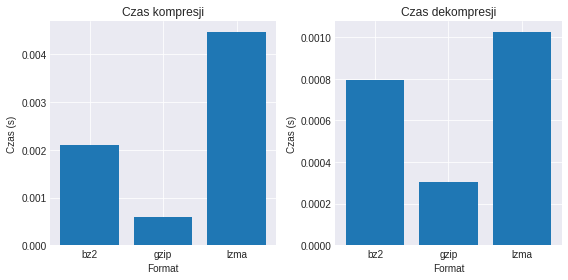

Utworzono plik compression_time/lorem_40960b.txt

Wyniki dla pliku compression_time/lorem_40960b.txt:
--------------------------------------------------
Kompresja:
 - Format:    Czas (s)
 - bz2:        0.0066089630126953125
 - gzip:       0.0037817955017089844
 - lzma:       0.02393794059753418
Dekompresja:
 - Format:    Czas (s)
 - bz2:        0.0030944347381591797
 - gzip:       0.000942230224609375
 - lzma:       0.0020973682403564453
--------------------------------------------------


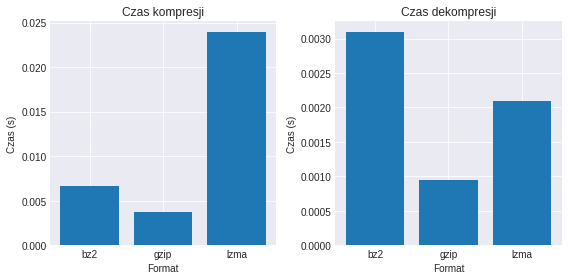

Utworzono plik compression_time/lorem_500000b.txt

Wyniki dla pliku compression_time/lorem_500000b.txt:
--------------------------------------------------
Kompresja:
 - Format:    Czas (s)
 - bz2:        0.06375360488891602
 - gzip:       0.04181218147277832
 - lzma:       0.4016261100769043
Dekompresja:
 - Format:    Czas (s)
 - bz2:        0.029118061065673828
 - gzip:       0.0044405460357666016
 - lzma:       0.017737388610839844
--------------------------------------------------


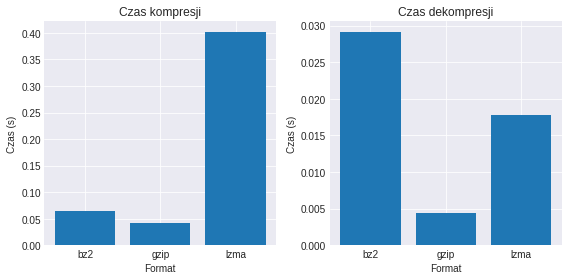

Utworzono plik compression_time/lorem_1000000b.txt

Wyniki dla pliku compression_time/lorem_1000000b.txt:
--------------------------------------------------
Kompresja:
 - Format:    Czas (s)
 - bz2:        0.1463167667388916
 - gzip:       0.08597254753112793
 - lzma:       0.6165356636047363
Dekompresja:
 - Format:    Czas (s)
 - bz2:        0.10739874839782715
 - gzip:       0.010331869125366211
 - lzma:       0.02449965476989746
--------------------------------------------------


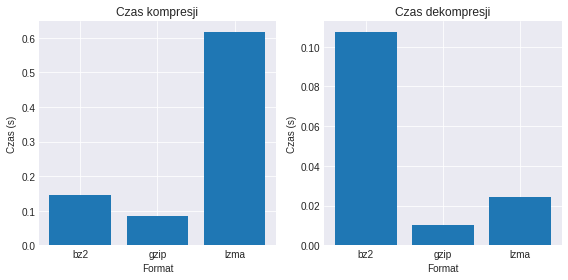

Utworzono plik compression_time/lorem_50000000b.txt

Wyniki dla pliku compression_time/lorem_50000000b.txt:
--------------------------------------------------
Kompresja:
 - Format:    Czas (s)
 - bz2:        6.223970413208008
 - gzip:       4.215808391571045
 - lzma:       56.52081871032715
Dekompresja:
 - Format:    Czas (s)
 - bz2:        3.217359781265259
 - gzip:       0.43240928649902344
 - lzma:       1.2715067863464355
--------------------------------------------------


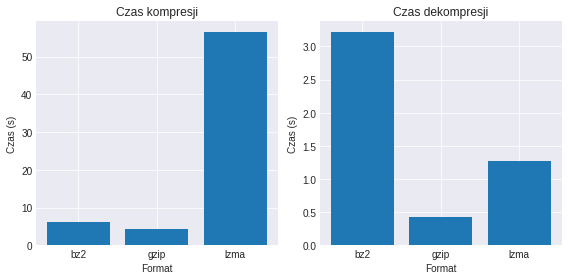

In [27]:
import os
import bz2
import gzip
import lzma
import time
import matplotlib.pyplot as plt

from faker import Faker

# Tworzenie obiektu Faker z ustawionym językiem na polski
fake = Faker('pl_PL')

# Rozmiary plików w bajtach
file_sizes = [1024, 40960, 500000, 1000000, 50000000]

def generate_time(file_sizes, fake):
# Pętla generująca pliki o różnych rozmiarach
    for size in file_sizes:
        # Tworzenie pliku txt o określonym rozmiarze
        file_name = f"compression_time/lorem_{size}b.txt"
        with open(file_name, "w", encoding="utf-8") as file:
            while os.path.getsize(file_name) < size:
                paragraph = fake.paragraph()
                file.write(paragraph)

        print(f"Utworzono plik {file_name}")

        # Kompresja i dekompresja plików
        compressed_files = []
        compression_times = []
        decompression_times = []

        # Kompresja przy użyciu bz2
        compressed_file_name = f"compression_time/compressed_bz2_{size}b.txt"
        start_time = time.time()
        with open(file_name, "rb") as input_file, bz2.open(compressed_file_name, "wb") as output_file:
            output_file.write(input_file.read())
        end_time = time.time()
        compression_time = end_time - start_time
        compressed_files.append(compressed_file_name)
        compression_times.append(compression_time)

        # Dekompresja przy użyciu bz2
        decompressed_file_name = f"compression_time/decompressed_bz2_{size}b.txt"
        start_time = time.time()
        with bz2.open(compressed_file_name, "rb") as input_file, open(decompressed_file_name, "wb") as output_file:
            output_file.write(input_file.read())
        end_time = time.time()
        decompression_time = end_time - start_time
        decompression_times.append(decompression_time)

        # Kompresja przy użyciu gzip
        compressed_file_name = f"compression_time/compressed_gzip_{size}b.txt"
        start_time = time.time()
        with open(file_name, "rb") as input_file, gzip.open(compressed_file_name, "wb") as output_file:
            output_file.write(input_file.read())
        end_time = time.time()
        compression_time = end_time - start_time
        compressed_files.append(compressed_file_name)
        compression_times.append(compression_time)

        # Dekompresja przy użyciu gzip
        decompressed_file_name = f"compression_time/decompressed_gzip_{size}b.txt"
        start_time = time.time()
        with gzip.open(compressed_file_name, "rb") as input_file, open(decompressed_file_name, "wb") as output_file:
            output_file.write(input_file.read())
        end_time = time.time()
        decompression_time = end_time - start_time
        decompression_times.append(decompression_time)

        # Kompresja przy użyciu lzma
        compressed_file_name = f"compression_time/compressed_lzma_{size}b.txt"
        start_time = time.time()
        with open(file_name, "rb") as input_file, lzma.open(compressed_file_name, "wb") as output_file:
            output_file.write(input_file.read())
        end_time = time.time()
        compression_time = end_time - start_time
        compressed_files.append(compressed_file_name)
        compression_times.append(compression_time)

        # Dekompresja przy użyciu lzma
        decompressed_file_name = f"compression_time/decompressed_lzma_{size}b.txt"
        start_time = time.time()
        with lzma.open(compressed_file_name, "rb") as input_file, open(decompressed_file_name, "wb") as output_file:
            output_file.write(input_file.read())
        end_time = time.time()
        decompression_time = end_time - start_time
        decompression_times.append(decompression_time)

        df = pd.DataFrame({"Format": ['bz2', 'gzip', 'lzma'], "Czas kompresji":[compression_times[0], compression_times[1], compression_times[2]],
                                                                      "Czas dekompresja":[decompression_times[0], decompression_times[1], decompression_times[2]]})
        df.set_index("Format", inplace=True)
        # Wyświetlanie wyników
        print(f"\nWyniki dla pliku {file_name}:")
        print("--------------------------------------------------")
        print(f"Kompresja:")
        print(" - Format:    Czas (s)")
        print(" - bz2:       ", compression_times[0])
        print(" - gzip:      ", compression_times[1])
        print(" - lzma:      ", compression_times[2])
        print(f"Dekompresja:")
        print(" - Format:    Czas (s)")
        print(" - bz2:       ", decompression_times[0])
        print(" - gzip:      ", decompression_times[1])
        print(" - lzma:      ", decompression_times[2])
        print("--------------------------------------------------")

        # Tworzenie wykresów
        formats = ['bz2', 'gzip', 'lzma']
        compression_data = [compression_times[i] for i in range(len(compression_times))]
        decompression_data = [decompression_times[i] for i in range(len(decompression_times))]

        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.bar(formats, compression_data)
        plt.title('Czas kompresji')
        plt.xlabel('Format')
        plt.ylabel('Czas (s)')

        plt.subplot(1, 2, 2)
        plt.bar(formats, decompression_data)
        plt.title('Czas dekompresji')
        plt.xlabel('Format')
        plt.ylabel('Czas (s)')

        plt.tight_layout()
        plt.show()
        

generate_time(file_sizes, fake)

## Kompresja obrazu

In [75]:
from PIL import Image
import os
import gzip
import shutil


def compare_compression(image_path):
    # Wczytaj obraz
    image = Image.open(image_path)

    # Bezstratna kompresja
    original_size = os.path.getsize(image_path)
    compressed_path = 'compressed_image.jpg.gz'
    with open(image_path, 'rb') as f_in:
        with gzip.open(compressed_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
    compressed_size = os.path.getsize(compressed_path)
    compression_ratio = original_size / compressed_size

    # Stratna kompresja
    compressed_image_path = 'compressed_image.jpg'
    image.save(compressed_image_path, optimize=True, quality=50)
    compressed_image_size = os.path.getsize(compressed_image_path)
    compression_ratio_lossy = original_size / compressed_image_size

    # Porównaj jakość obrazów
    original_image = Image.open(image_path)
    compressed_image = Image.open(compressed_image_path)
    

    df = pd.DataFrame({'Original size':[original_size], 'Lossless compress size':compressed_size,
                        'Lossless compress ratio':[compression_ratio],'Lossy compress size':[compressed_image_size],
                           'Lossy compress ratio':[compression_ratio_lossy]})

    # Wyświetl obrazy
    original_image.show(title='Original Image')
    compressed_image.show(title='Compressed Image (Lossy)')

    # Usuń tymczasowe pliki
    os.remove(compressed_path)
    os.remove(compressed_image_path)
    return df

In [76]:
df = pd.DataFrame()
image_path = ['images/newyork.jpg', 'images/house.jpg','images/road.jpg', 'images/obraz.jpg']
for path in image_path:
    data = compare_compression(path)
    df = pd.concat([df, data])
    
df = df.set_index("Original size")
pd.set_option('expand_frame_repr', False)


(eog:68114): EOG-CRITICAL **: 12:04:45.800: eog_image_get_file: assertion 'EOG_IS_IMAGE (img)' failed

(eog:68114): GLib-GIO-CRITICAL **: 12:04:45.800: g_file_equal: assertion 'G_IS_FILE (file1)' failed


               Lossless compress size  Lossless compress ratio  Lossy compress size  Lossy compress ratio
Original size                                                                                            
226989                         225635                 1.006001               103512              2.192876
336050                         335493                 1.001660               173653              1.935181
17079                           17108                 0.998305                12925              1.321393
154265                         154203                 1.000402                59665              2.585519



(eog:68114): EOG-CRITICAL **: 12:04:46.835: eog_image_get_file: assertion 'EOG_IS_IMAGE (img)' failed

(eog:68114): GLib-GIO-CRITICAL **: 12:04:46.835: g_file_equal: assertion 'G_IS_FILE (file1)' failed

(eog:68114): EOG-CRITICAL **: 12:04:46.835: eog_image_get_file: assertion 'EOG_IS_IMAGE (img)' failed

(eog:68114): GLib-GIO-CRITICAL **: 12:04:46.835: g_file_equal: assertion 'G_IS_FILE (file1)' failed

(eog:68114): EOG-CRITICAL **: 12:04:46.835: eog_image_get_file: assertion 'EOG_IS_IMAGE (img)' failed

(eog:68114): GLib-GIO-CRITICAL **: 12:04:46.835: g_file_equal: assertion 'G_IS_FILE (file1)' failed

(eog:68114): EOG-CRITICAL **: 12:04:46.835: eog_image_get_file: assertion 'EOG_IS_IMAGE (img)' failed

(eog:68114): GLib-GIO-CRITICAL **: 12:04:46.835: g_file_equal: assertion 'G_IS_FILE (file1)' failed

(eog:68114): EOG-CRITICAL **: 12:04:46.910: eog_image_get_file: assertion 'EOG_IS_IMAGE (img)' failed

(eog:68114): GLib-GIO-CRITICAL **: 12:04:46.910: g_file_equal: assertion 'G_IS_F

In [77]:
df.sort_index()

,Lossless compress size,Lossless compress ratio,Lossy compress size,Lossy compress ratio
Original size,,,,
17079,17108,0.998305,12925,1.321393
154265,154203,1.000402,59665,2.585519
226989,225635,1.006001,103512,2.192876
336050,335493,1.001660,173653,1.935181


## Kompresja dla danych zaszyfrowanych

In [1]:
def compression_of_encrypted_data(prefix, filenames):
    first_data = []
    for filename in filenames:
        first_data.append(os.path.getsize(prefix + filename))
    print(first_data)
    def compress_file(file_path, output_file):
        with open(file_path, 'rb') as input_file, lzma.open(output_file, 'wb') as output:
            output.write(input_file.read())

    for filename in filenames:
        compress_file(prefix + filename, "encrypted_compress/" + filename)
        
    compressed_data = []
    for filename in filenames:
        compressed_data.append(os.path.getsize("encrypted_compress/" + filename))
    print(compressed_data)
    
    pd_compressed = pd.DataFrame({"przed_kompresja": first_data, "po_kompresji": compressed_data})
    pd_compressed
    return pd_compressed

In [18]:
prefix = "encrypted/"
filenames = ["lorem_10b.txt", "lorem_50b.txt", "lorem_100b.txt", "lorem_200b.txt"]
pd_compressed_enc1 = compression_of_encrypted_data(prefix, filenames)
pd_compressed_enc1

[5566, 30295, 61227, 122968]
[2572, 6764, 8284, 10100]


,przed_kompresja,po_kompresji
0,5566,2572
1,30295,6764
2,61227,8284
3,122968,10100


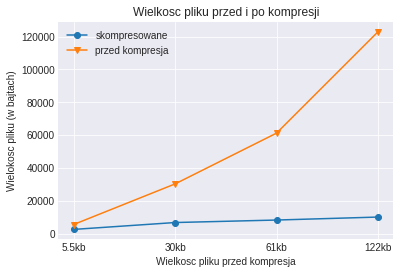

In [19]:
plot_data(pd_compressed_enc1, "Wielkosc pliku przed i po kompresji", "Wielokosc pliku (w bajtach)",
         [0, 1, 2, 3], ['5.5kb', '30kb', '61kb', '122kb'])

In [20]:
prefix = "encrypted/"
filenames = ["lorem_300b.txt", "lorem_1024.txt", "lorem_10240.txt"]
pd_compressed_enc2 = compression_of_encrypted_data(prefix, filenames)
pd_compressed_enc2

[184782, 632697, 5939754]
[10728, 16900, 42944]


,przed_kompresja,po_kompresji
0,184782,10728
1,632697,16900
2,5939754,42944


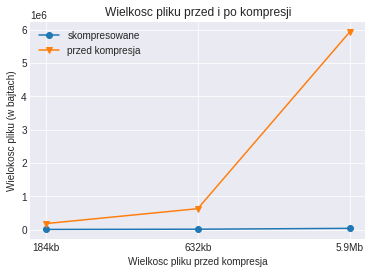

In [21]:
plot_data(pd_compressed_enc2, "Wielkosc pliku przed i po kompresji", "Wielokosc pliku (w bajtach)",
         [0, 1, 2], ['184kb', '632kb', '5.9Mb'])

In [22]:
prefix = "compression_rate/"
filenames = ["lorem_10b.txt", "lorem_50b.txt", "lorem_100b.txt", "lorem_200b.txt"]
pd_compressed1 = compression_of_encrypted_data(prefix, filenames)
pd_compressed1

[11, 55, 109, 210]
[68, 112, 168, 236]


,przed_kompresja,po_kompresji
0,11,68
1,55,112
2,109,168
3,210,236


In [23]:
filenames = ["lorem_300b.txt", "lorem_1024b.txt", "lorem_10240b.txt"]
pd_compressed2 = compression_of_encrypted_data(prefix, filenames)
pd_compressed2

[319, 1101, 10356]
[324, 840, 5016]


,przed_kompresja,po_kompresji
0,319,324
1,1101,840
2,10356,5016
